# Import

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

# Wrangle function

In [4]:
#Wrangle function which include data cleanining and preparation

def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    df['diabetes'] = df['diabetes'].astype(int)
    #Dropping column with multicollinearity
    df.drop(columns='skin', inplace = True)

    #Replacing the O value with the mean of the column
    df['insulin'] = df['insulin'].replace(0, np.nan)
    df['insulin'] = df['insulin'].fillna(df['insulin'].mean()).round(1)

    #Removing outliers in the age column
    low, high = df['age'].quantile([0.05, 0.95])
    df = df[df['age'].between(low, high)]

   


    return df

In [7]:

#Importing our dataset
df = wrangle(r"C:\Users\HP\Desktop\pima-data.csv")

# Exploring our dataset

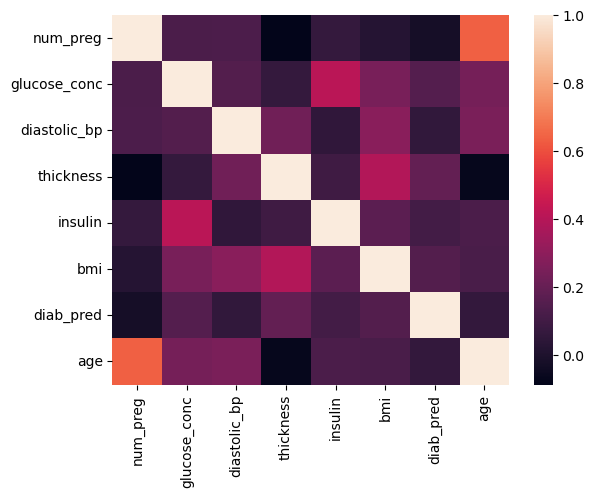

In [4]:
# correlation heatmap to make sure there is no multicollinearity column

correlation = df.drop(columns='diabetes').corr()
sns.heatmap(correlation);

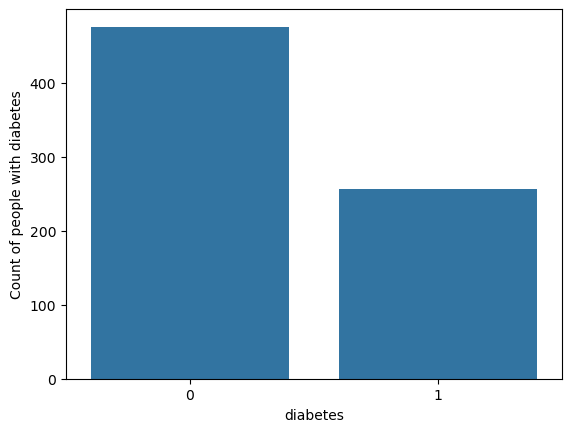

In [5]:
#Visualizing the number of people with diabetes

sns.countplot(x='diabetes', data=df)
plt.ylabel('Count of people with diabetes')
plt.show()

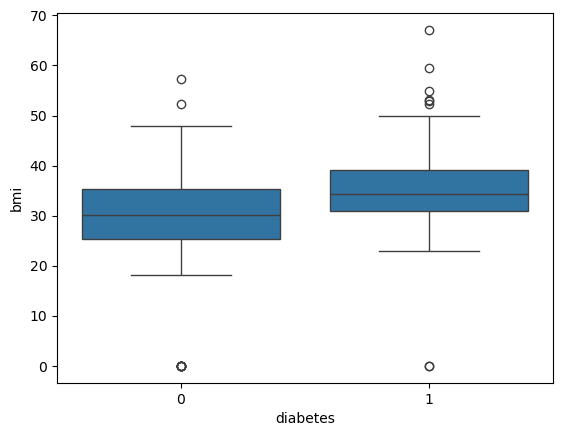

In [8]:
#Boxplot to compare BMI distribution between diabetic and non-diabetic individuals  

sns.boxplot(x='diabetes', y='bmi', data=df);

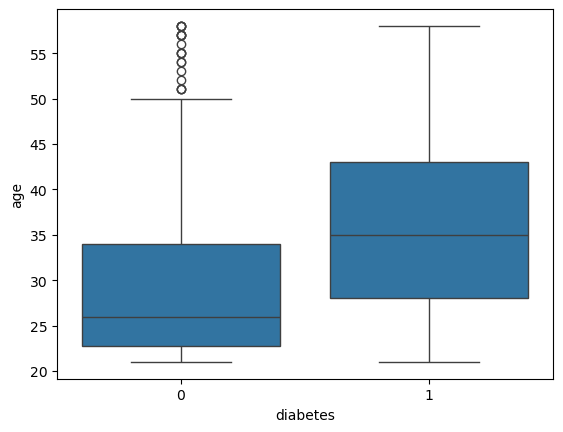

In [7]:
# Boxplot to compare Age distribution between diabetic and non-diabetic individuals and to get outliers

sns.boxplot(x='diabetes', y='age', data=df);


# Splitting

In [8]:
#spliting the target and features
X=  df.drop(columns = 'diabetes')
y = df['diabetes']

In [9]:
##Spliting to get our test, train, and validation set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2 , random_state = 42)

# Baseline

In [10]:
#Building our baseline
Baseline= y_train.value_counts(normalize=True).max()
print(f"Baseline accuracy score :  {Baseline}")

Baseline accuracy score :  0.6484641638225256


# Build Model

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)  

LogisticRegression(max_iter=1000)

In [12]:
#Training our Model

y_pred_train = model.predict(X_train)
y_pred_train[:3]

array([0, 0, 0])

In [13]:
#TEsting our Model
y_pred_test = model.predict(X_test)
y_pred_train[:3]

array([0, 0, 0])

In [14]:
#Checking our accuracy score for the training model and test model
print(f' Training model accuracy {model.score(X_train, y_train )}')
print(f' Testing model accuracy {model.score(X_test, y_test )}')

 Training model accuracy 0.7679180887372014
 Testing model accuracy 0.8163265306122449


In [15]:
#checking probability estimate

y_train_pred_proba = model.predict_proba(X_train)
print(y_train_pred_proba[:5])

[[0.64813088 0.35186912]
 [0.69064749 0.30935251]
 [0.77542558 0.22457442]
 [0.89524491 0.10475509]
 [0.52414589 0.47585411]]


# Communicate Result

In [16]:
#Getting feature names from the dataset and extracting importances from model

features = X
importance = model.coef_[0]

In [17]:
#creating a series with our features and importance to create  horizontal bar chart for the odd ratio
odd_ratio = pd.Series(np.exp(importance) , index= X.columns ).sort_values()

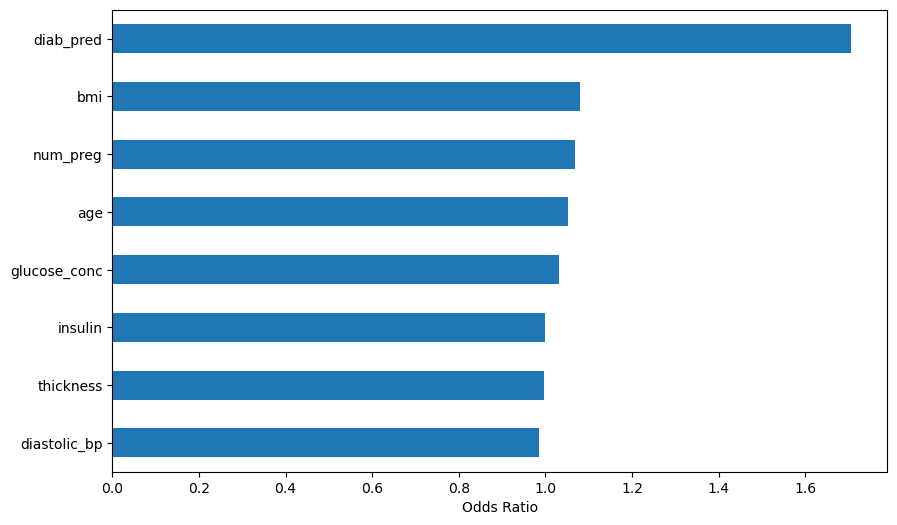

In [18]:
#Visualizing the odd ratio

odd_ratio.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Odds Ratio');

# Make Prediction

In [89]:
def predict_diabetes (num_preg, glucose_conc , diastolic_bp, thickness, insulin,bmi,diab_pred, age):
    input = {'num_preg' : num_preg, 'glucose_conc': glucose_conc , 'diastolic_bp': diastolic_bp, 'thickness': thickness,
    'insulin': insulin, 'bmi': bmi,'diab_pred': diab_pred, 'age': age}
                         
    df = pd.DataFrame(input, index=[0])
    prediction= model.predict(df)
    if prediction == 1:
        return 'The person is likely to have diabetes'
    else:
        return 'The person is unlikely to have diabetes'

In [113]:
predict_diabetes(1,67,98,200,50,30,5,50)

'The person is unlikely to have diabetes'